## Lung cancer stacking

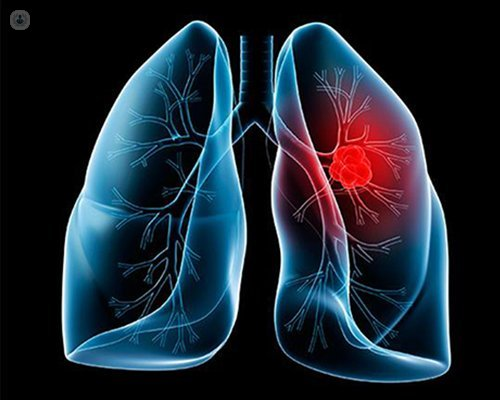

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [ ]:
# Loading the csv_file
df=pd.read_csv("/content/survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
print(df['LUNG_CANCER'].value_counts())

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

desired_sample_size = max(df['LUNG_CANCER'].value_counts())

# Separating YES and NO samples
yes_samples = df[df['LUNG_CANCER'] == 'YES']
no_samples = df[df['LUNG_CANCER'] == 'NO']

# Sampling the YES and NO data to match the desired sample size
yes_samples_resampled = yes_samples.sample(desired_sample_size, replace=True, random_state=42)
no_samples_resampled = no_samples.sample(desired_sample_size, replace=True, random_state=42)

# Concatenating the resampled samples
resampled_df = pd.concat([yes_samples_resampled, no_samples_resampled])

# Shuffling the DataFrame to insert the samples randomly
resampled_df = resampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(resampled_df['LUNG_CANCER'].value_counts())


YES    270
NO     270
Name: LUNG_CANCER, dtype: int64


In [ ]:
df1=resampled_df
df1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,62,2,2,1,1,2,1,2,1,1,2,2,2,2,YES
1,M,55,2,1,1,1,1,2,1,1,1,1,1,1,1,YES
2,F,87,1,1,1,1,2,2,1,1,1,1,2,1,1,NO
3,M,64,1,2,2,1,2,1,2,1,2,2,2,1,2,YES
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,M,62,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
536,F,59,1,2,2,2,2,2,1,2,2,1,1,1,1,YES
537,F,63,1,1,1,1,2,2,1,1,1,1,2,1,1,NO
538,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO


In [ ]:
df1.shape

(540, 16)

In [ ]:
df1.LUNG_CANCER.values

array(['YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES

In [ ]:
df2 = df1.replace([1, 2], [0, 1])
df2

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,62,1,1,0,0,1,0,1,0,0,1,1,1,1,YES
1,M,55,1,0,0,0,0,1,0,0,0,0,0,0,0,YES
2,F,87,0,0,0,0,1,1,0,0,0,0,1,0,0,NO
3,M,64,0,1,1,0,1,0,1,0,1,1,1,0,1,YES
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,M,62,1,1,1,0,1,1,1,1,0,0,1,0,0,YES
536,F,59,0,1,1,1,1,1,0,1,1,0,0,0,0,YES
537,F,63,0,0,0,0,1,1,0,0,0,0,1,0,0,NO
538,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO


In [ ]:
df2.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,62,1,1,0,0,1,0,1,0,0,1,1,1,1,YES
1,M,55,1,0,0,0,0,1,0,0,0,0,0,0,0,YES
2,F,87,0,0,0,0,1,1,0,0,0,0,1,0,0,NO
3,M,64,0,1,1,0,1,0,1,0,1,1,1,0,1,YES
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [ ]:
df2.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
535,M,62,1,1,1,0,1,1,1,1,0,0,1,0,0,YES
536,F,59,0,1,1,1,1,1,0,1,1,0,0,0,0,YES
537,F,63,0,0,0,0,1,1,0,0,0,0,1,0,0,NO
538,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
539,M,56,1,0,0,0,1,0,1,1,1,1,1,0,1,YES


In [ ]:
df2.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df2.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
df2.shape

(540, 16)

In [ ]:
df2.LUNG_CANCER.unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 540 non-null    object
 1   AGE                    540 non-null    int64 
 2   SMOKING                540 non-null    int64 
 3   YELLOW_FINGERS         540 non-null    int64 
 4   ANXIETY                540 non-null    int64 
 5   PEER_PRESSURE          540 non-null    int64 
 6   CHRONIC DISEASE        540 non-null    int64 
 7   FATIGUE                540 non-null    int64 
 8   ALLERGY                540 non-null    int64 
 9   WHEEZING               540 non-null    int64 
 10  ALCOHOL CONSUMING      540 non-null    int64 
 11  COUGHING               540 non-null    int64 
 12  SHORTNESS OF BREATH    540 non-null    int64 
 13  SWALLOWING DIFFICULTY  540 non-null    int64 
 14  CHEST PAIN             540 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df2.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,62.561111,0.553704,0.453704,0.414815,0.396296,0.457407,0.616667,0.362963,0.411111,0.381481,0.427778,0.637037,0.298148,0.420370
std,9.442629,0.497568,0.498314,0.493147,0.489581,0.498644,0.486649,0.481300,0.492492,0.486201,0.495215,0.481300,0.457869,0.494076
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(df2['LUNG_CANCER'].value_counts())

YES    270
NO     270
Name: LUNG_CANCER, dtype: int64


In [ ]:
print(df2['GENDER'].value_counts())
print(df2['SMOKING'].value_counts())


F    301
M    239
Name: GENDER, dtype: int64
1    299
0    241
Name: SMOKING, dtype: int64


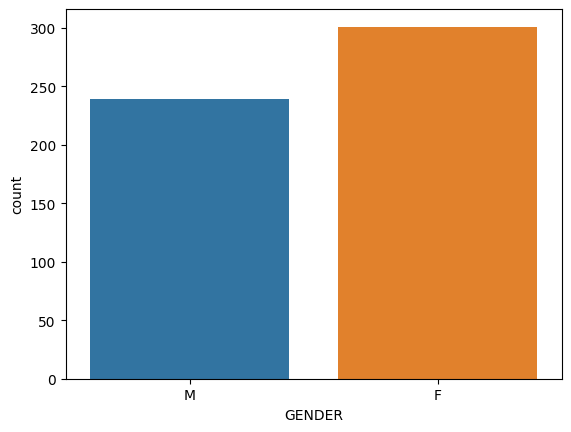

In [ ]:
# Countplot is done on Gender feature to show the no. of males and females is affected from Lung cancer
sns.countplot(x='GENDER', data=df2)
plt.show()


From the above plot we can see that the majority of the people who are suffering from Lung cancer are Females.

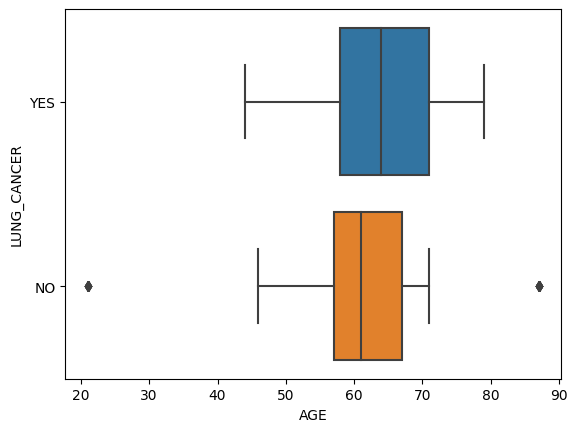

In [ ]:
# Boxplot is plotted between Age and Lung cancer to show the people suffering from Lung cancer based on Age no.
sns.boxplot(x='AGE', y='LUNG_CANCER', data=df2)
plt.show()

From the above box plot,we can see that there are few outliers in the boxplot which shows that some randomly aged people are not suffering from lung cancer.

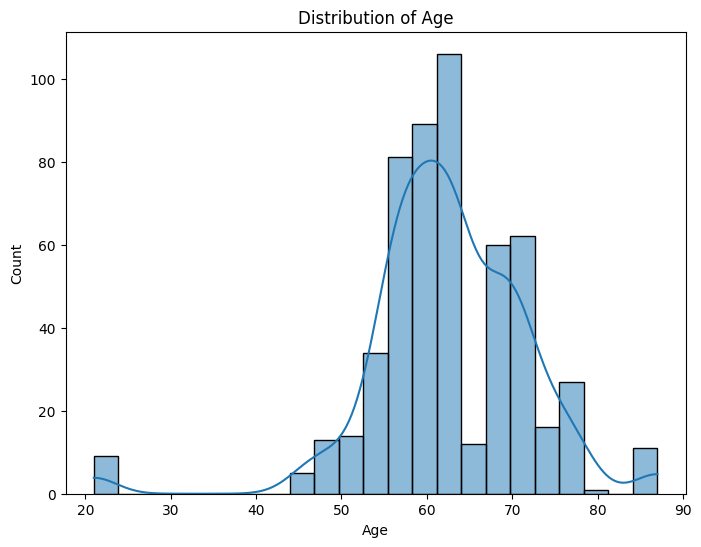

In [ ]:
# Plotting the histogram showing the majority people affected from LUNG CANCER based on AGE number.

plt.figure(figsize=(8, 6))
sns.histplot(df2['AGE'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

From the plot we can see the disribution of Age and the most of the people who are suffering from Lung cancer are of 55-75 aged people.

In [ ]:
df2.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.081255,-0.059724,-0.020196,0.025252,-0.015601,0.079194,-0.046529,0.171722,0.117359,0.136636,0.035915,-0.019885,0.018543
SMOKING,-0.081255,1.000000,0.039977,0.075386,-0.057065,-0.245005,0.012387,0.150869,-0.128120,-0.023490,-0.089643,0.004074,0.120963,0.160817
YELLOW_FINGERS,-0.059724,0.039977,1.000000,0.448231,0.181809,-0.000484,-0.268407,-0.038105,0.032339,-0.080121,0.136790,-0.170756,0.365538,0.075425
ANXIETY,-0.020196,0.075386,0.448231,1.000000,0.193875,-0.003465,-0.256144,-0.143073,-0.145820,0.158998,-0.158186,-0.427540,0.478330,-0.062157
PEER_PRESSURE,0.025252,-0.057065,0.181809,0.193875,1.000000,0.054070,0.000260,-0.099790,0.084812,0.080771,0.049400,-0.152164,0.258195,0.100022
CHRONIC DISEASE,-0.015601,-0.245005,-0.000484,-0.003465,0.054070,1.000000,0.020515,0.126378,-0.049442,0.074796,-0.252903,0.028230,0.076039,-0.171933
FATIGUE,0.079194,0.012387,-0.268407,-0.256144,0.000260,0.020515,1.000000,0.119871,0.171076,-0.211972,0.065821,0.529650,-0.152233,-0.030736
ALLERGY,-0.046529,0.150869,-0.038105,-0.143073,-0.099790,0.126378,0.119871,1.000000,0.347694,0.414092,0.273650,0.089226,0.072090,0.348023
WHEEZING,0.171722,-0.128120,0.032339,-0.145820,0.084812,-0.049442,0.171076,0.347694,1.000000,0.327832,0.525143,0.153236,0.154770,0.264405
ALCOHOL CONSUMING,0.117359,-0.023490,-0.080121,0.158998,0.080771,0.074796,-0.211972,0.414092,0.327832,1.000000,0.207107,-0.263454,0.171526,0.350666


## 1.Health Risk Assessment:

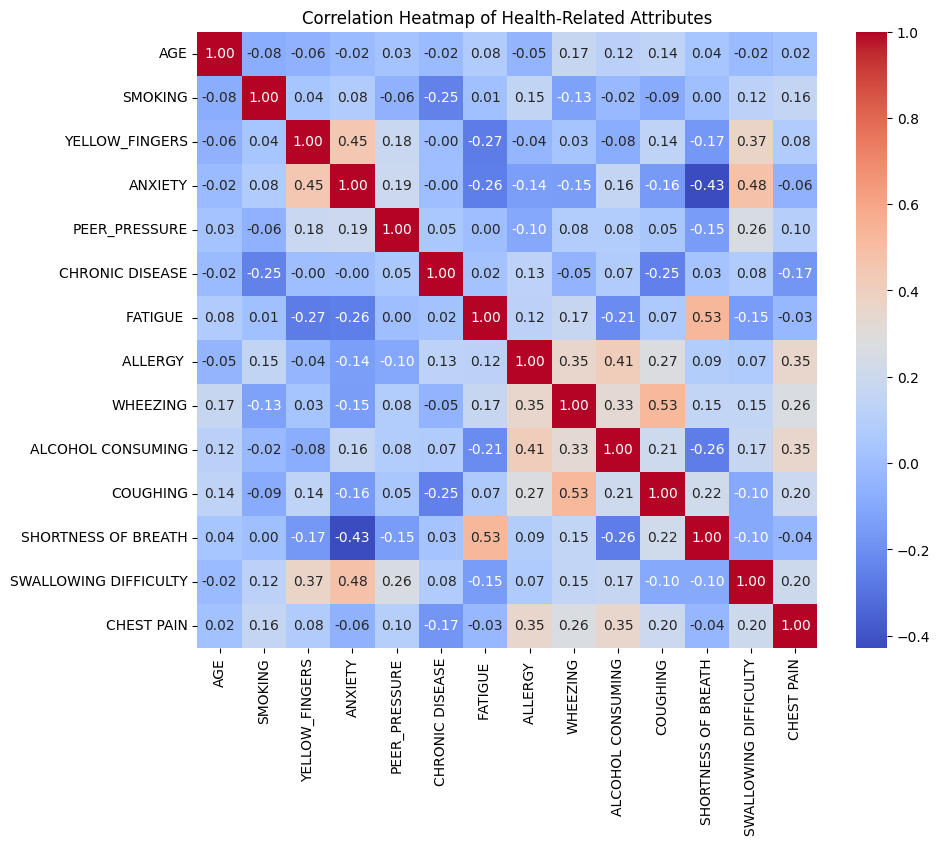

In [ ]:
# Correlation heatmap to analyze the relationships between health-related attributes
corr_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Health-Related Attributes')
plt.show()


The above plot shows us the positive and negative correlation heatmap for health-related attributes like anxiety, allergy,chest pain,fatigue,etc.. we can see the correlation between all the features.From the above plot the colmnns Anxiety, allergy,chest pain,fatigue seem to have psitive correlation

## 2.Respiratory Health Analysis:

<Figure size 1000x600 with 0 Axes>

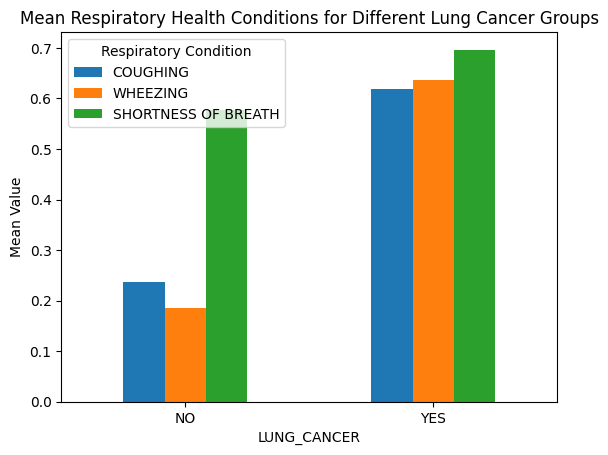

In [ ]:
plt.figure(figsize=(10, 6))
df2.groupby('LUNG_CANCER')[['COUGHING', 'WHEEZING', 'SHORTNESS OF BREATH']].mean().plot(kind='bar')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Mean Value')
plt.title('Mean Respiratory Health Conditions for Different Lung Cancer Groups')
plt.xticks(rotation=0)
plt.legend(title='Respiratory Condition',loc = 'best')
plt.show()

From the above bar plot we can see that most of the people who are suffering from Lung cancer have more shortness of breath,wheezing and coughing and who are not suffering with Lung cancer also have these symptoms but less compared to having Lung cancer.

## 3.Health Behavior Analysis:

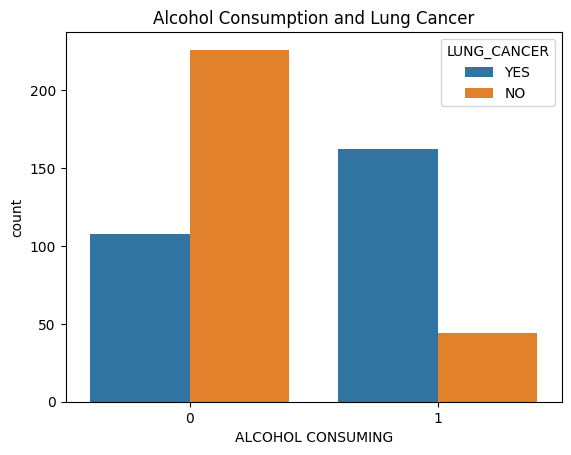

In [ ]:
# Bar plot to compare alcohol consumption between individuals with and without lung cancer
sns.countplot(x='ALCOHOL CONSUMING', hue='LUNG_CANCER', data=df2)
plt.title('Alcohol Consumption and Lung Cancer')
plt.show()


<Figure size 1000x600 with 0 Axes>

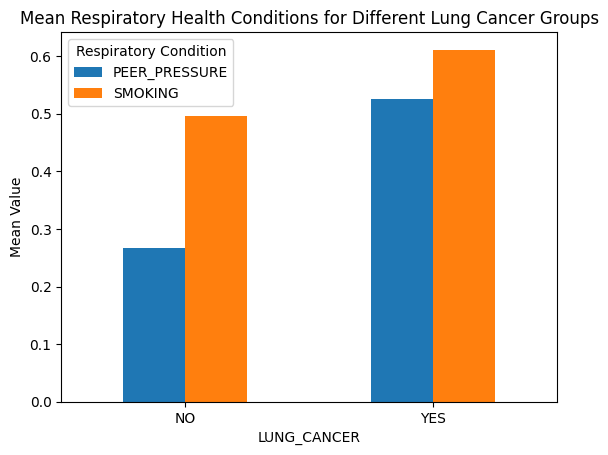

In [ ]:
plt.figure(figsize=(10, 6))
df2.groupby('LUNG_CANCER')[['PEER_PRESSURE','SMOKING']].mean().plot(kind='bar')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Mean Value')
plt.title('Mean Respiratory Health Conditions for Different Lung Cancer Groups')
plt.xticks(rotation=0)
plt.legend(title='Respiratory Condition',loc = 'best')
plt.show()

From the above two plots we can see the bar graph showing the health behavioural conditions and how many people sre affected from lung cancer due to alcohal consuming and the mean value of the health attributes thatb lead to cancer.


## 4.Gender and Health:

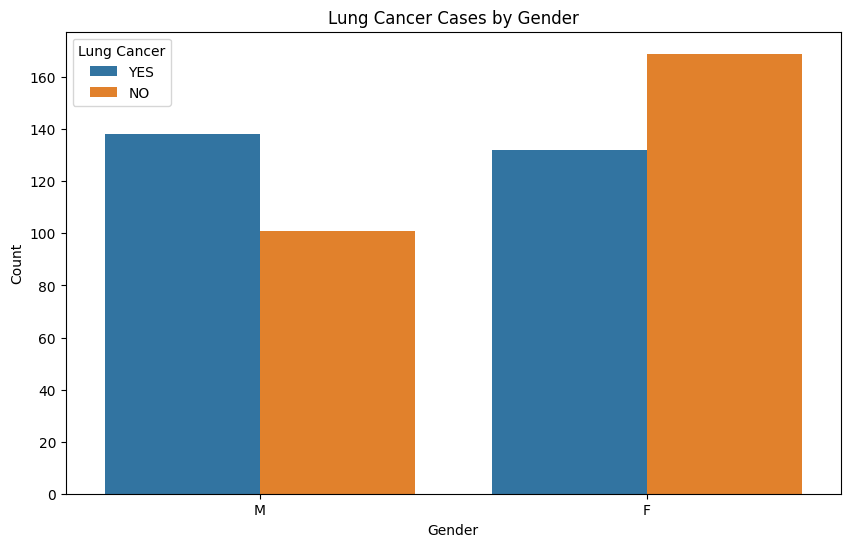

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df2)
plt.title('Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Lung Cancer')
plt.show()

The above Barplot decribes the no.of males and females suffering and not suffering from Lung cancer.

## 5.Age and Health:

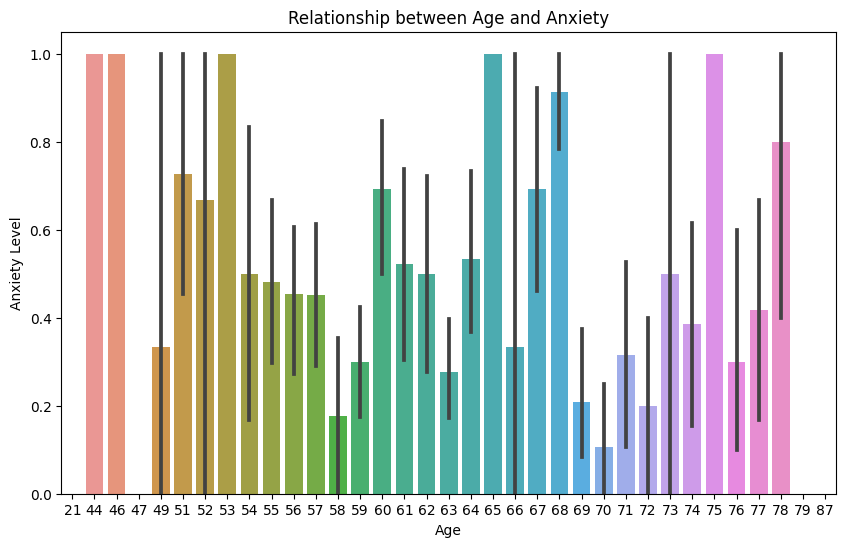

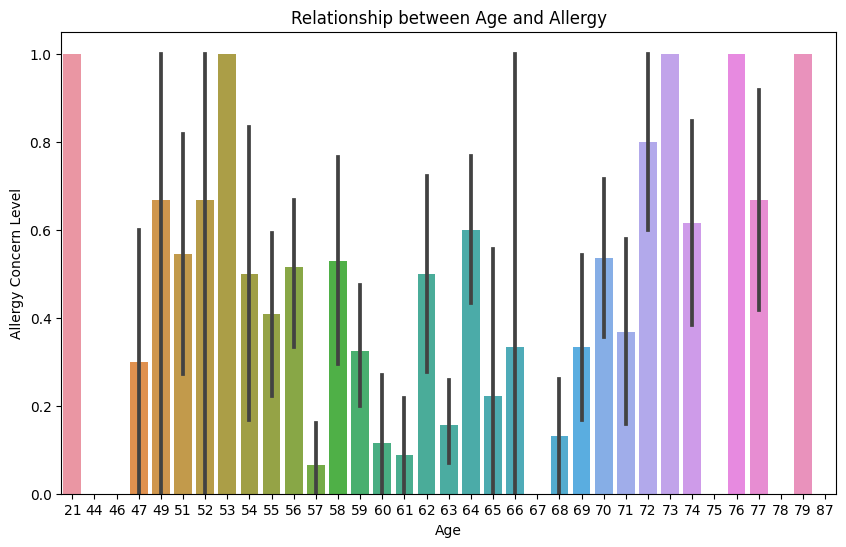

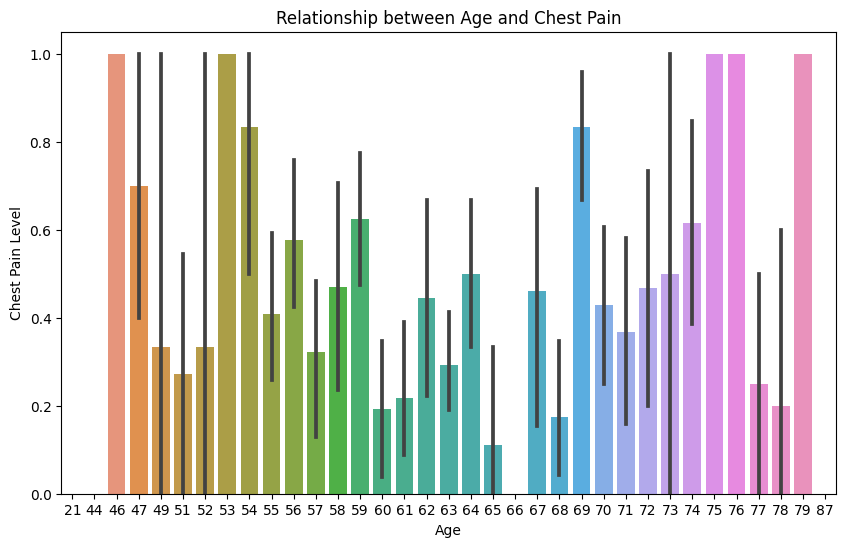

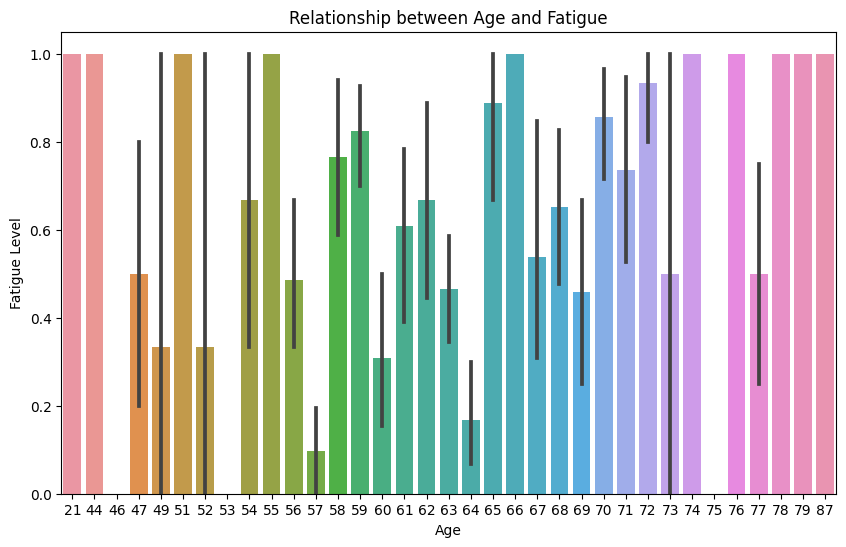

In [ ]:
# Barplot is plotted between Age and different health-related symptoms

plt.figure(figsize=(10, 6))
sns.barplot(x='AGE', y='ANXIETY', data=df2)
plt.title('Relationship between Age and Anxiety')
plt.xlabel('Age')
plt.ylabel('Anxiety Level')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='AGE', y= 'ALLERGY ', data=df2)
plt.title('Relationship between Age and Allergy')
plt.xlabel('Age')
plt.ylabel('Allergy Concern Level')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='AGE', y='CHEST PAIN', data=df2)
plt.title('Relationship between Age and Chest Pain')
plt.xlabel('Age')
plt.ylabel('Chest Pain Level')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='AGE', y= 'FATIGUE ', data=df2)
plt.title('Relationship between Age and Fatigue')
plt.xlabel('Age')
plt.ylabel('Fatigue Level')
plt.show()


The above Barplots plots showcase the relationship between age and specific health-related symptoms (e.g., anxiety, allergy, chest pain, fatigue) can help identify trends or patterns. For example, if anxiety levels tend to increase with age, it might indicate that older individuals are more prone to anxiety and likewise with the other heailth attributes.

## 6.Allergies and Health:

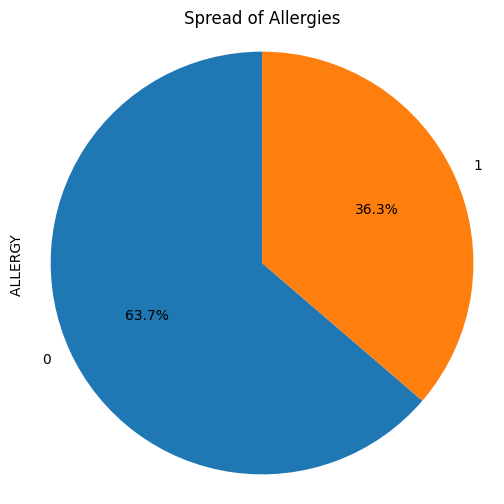

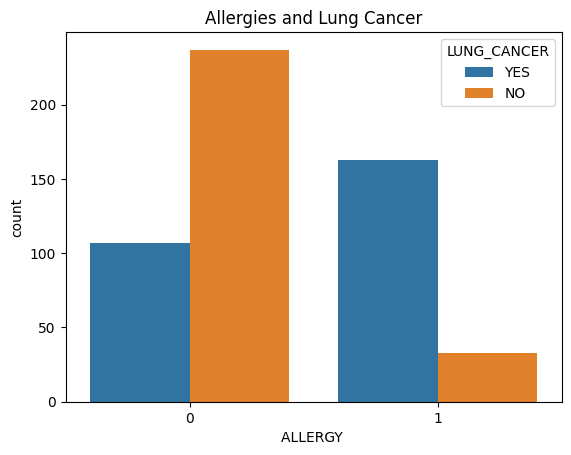

In [ ]:
# Pie chart to visualize the Spread of allergies
plt.figure(figsize=(6, 6))
df2['ALLERGY '].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Spread of Allergies')
plt.axis('equal')
plt.show()

# Bar plot to compare the spread of allergies in individuals with and without lung cancer
sns.countplot(x='ALLERGY ', hue='LUNG_CANCER', data=df2)
plt.title('Allergies and Lung Cancer')
plt.show()


The above drawn Count plot and Pie plot indicates the relation between Allergy and Lung cancer which showcases us the spread of allergies in people suffering with Lung cancer and without Lung cancer. One of the output from the plot we can understand is that Spread of Allergy is less in people without Lung cancer compared to People with Lung cancer.

## 7.Lung Cancer Prediction

### 1.  Loistic Regression

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df2.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,62,1,1,0,0,1,0,1,0,0,1,1,1,1,YES
1,M,55,1,0,0,0,0,1,0,0,0,0,0,0,0,YES
2,F,87,0,0,0,0,1,1,0,0,0,0,1,0,0,NO
3,M,64,0,1,1,0,1,0,1,0,1,1,1,0,1,YES
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [ ]:
df2.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
X = df2.drop('LUNG_CANCER', axis=1)
y = df2['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("X_train-->",X_train.shape)
print("X_test-->",X_test.shape)
print("y_train-->",X_train.shape)
print("y_test-->",y_test.shape)

X_train--> (432, 15)
X_test--> (108, 15)
y_train--> (432, 15)
y_test--> (108,)


In [ ]:
# Using One-hot encoder to the 'GENDER' column
encoder = OneHotEncoder(drop='first', sparse_output=True)
X_encoded = encoder.fit_transform(X[['GENDER']])
X.drop('GENDER', axis=1, inplace=True)

# Combining the one-hot encoded features with the numerical features
X_combined = hstack([X.values, X_encoded])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [ ]:
# Data Scaling for numerical features only
scaler = StandardScaler(with_mean=False)
ct = ColumnTransformer(
    transformers=[('num', scaler, slice(0, X.shape[1]))], remainder='passthrough')

X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)


In [ ]:
result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy','Train Recall','Test Recall','Train Precision','Test Precision','Train F1-score','Test F1-score'])

# KNN Classifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='YES')
precision = precision_score(y_test, y_pred, pos_label='YES')
f1 = f1_score(y_test, y_pred, pos_label='YES')

knn_model_train_accuracy = accuracy_score(y_train, knn_model.predict(X_train_scaled))
knn_model_test_accuracy = accuracy_score(y_test, knn_model.predict(X_test_scaled))
knn_model_train_recall=recall_score(y_train, knn_model.predict(X_train_scaled), pos_label='YES')
knn_model_test_recall = recall_score(y_test, knn_model.predict(X_test_scaled), pos_label='YES')
knn_model_train_precision=precision_score(y_train,knn_model.predict(X_train_scaled), pos_label='YES')
knn_model_test_precision=precision_score(y_test,knn_model.predict(X_test_scaled), pos_label='YES')
knn_model_train_f1_score=f1_score(y_train,knn_model.predict(X_train_scaled), pos_label='YES')
knn_model_test_f1_score=f1_score(y_test,knn_model.predict(X_test_scaled), pos_label='YES')

In [ ]:
print(f'Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}, F1-Score: {f1:.2f}')

Accuracy: 0.95, Recall: 0.92, Precision: 1.00, F1-Score: 0.96


In [ ]:
result = result.append(pd.Series({'Model':'KNN Classifier','Train Accuracy':knn_model_train_accuracy,'Test Accuracy':knn_model_test_accuracy,'Train Recall':knn_model_train_recall,'Test Recall':knn_model_test_recall,'Train Precision':knn_model_train_precision,'Test Precision':knn_model_test_precision,'Train F1-score':knn_model_train_f1_score,'Test F1-score':knn_model_test_f1_score}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-score,Test F1-score
0,KNN Classifier,0.962963,0.953704,0.92823,0.918033,0.994872,1.0,0.960396,0.957265


In [ ]:
# Model training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Model evaluation
y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='YES')
precision = precision_score(y_test, y_pred, pos_label='YES')
f1 = f1_score(y_test, y_pred, pos_label='YES')

model_train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
model_test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
model_train_recall=recall_score(y_train, model.predict(X_train_scaled), pos_label='YES')
model_test_recall = recall_score(y_test, model.predict(X_test_scaled), pos_label='YES')
model_train_precision=precision_score(y_train,model.predict(X_train_scaled), pos_label='YES')
model_test_precision=precision_score(y_test,model.predict(X_test_scaled), pos_label='YES')
model_train_f1_score=f1_score(y_train,model.predict(X_train_scaled), pos_label='YES')
model_test_f1_score=f1_score(y_test,model.predict(X_test_scaled), pos_label='YES')

print(f'Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}, F1-Score: {f1:.2f}')

Accuracy: 0.94, Recall: 0.89, Precision: 1.00, F1-Score: 0.94


In [ ]:
result = result.append(pd.Series({'Model':'LogisticRegression','Train Accuracy':model_train_accuracy,'Test Accuracy':model_test_accuracy,'Train Recall':model_train_recall,'Test Recall':model_test_recall,'Train Precision':model_train_precision,'Test Precision':model_test_precision,'Train F1-score':model_train_f1_score,'Test F1-score':model_test_f1_score}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-score,Test F1-score
0,KNN Classifier,0.962963,0.953704,0.928230,0.918033,0.994872,1.0,0.960396,0.957265
1,LogisticRegression,0.967593,0.935185,0.937799,0.885246,0.994924,1.0,0.965517,0.939130


## RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)

y_pred = rfc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='YES')
precision = precision_score(y_test, y_pred, pos_label='YES')
f1 = f1_score(y_test, y_pred, pos_label='YES')

rfc_train_accuracy = accuracy_score(y_train, rfc.predict(X_train_scaled))
rfc_test_accuracy = accuracy_score(y_test, rfc.predict(X_test_scaled))
rfc_train_recall=recall_score(y_train, rfc.predict(X_train_scaled), pos_label='YES')
rfc_test_recall = recall_score(y_test, rfc.predict(X_test_scaled), pos_label='YES')
rfc_train_precision=precision_score(y_train,rfc.predict(X_train_scaled), pos_label='YES')
rfc_test_precision=precision_score(y_test,rfc.predict(X_test_scaled), pos_label='YES')
rfc_train_f1_score=f1_score(y_train,rfc.predict(X_train_scaled), pos_label='YES')
rfc_test_f1_score=f1_score(y_test,rfc.predict(X_test_scaled), pos_label='YES')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


Accuracy: 0.9722222222222222
Recall: 0.9508196721311475
Precision: 1.0
F1 Score: 0.9747899159663865


In [ ]:
result = result.append(pd.Series({'Model':'RandomForest','Train Accuracy':rfc_train_accuracy,'Test Accuracy':rfc_test_accuracy,'Train Recall':rfc_train_recall,'Test Recall':rfc_test_recall,'Train Precision':rfc_train_precision,'Test Precision':rfc_test_precision,'Train F1-score':rfc_train_f1_score,'Test F1-score':rfc_test_f1_score}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-score,Test F1-score
0,KNN Classifier,0.962963,0.953704,0.928230,0.918033,0.994872,1.0,0.960396,0.957265
1,LogisticRegression,0.967593,0.935185,0.937799,0.885246,0.994924,1.0,0.965517,0.939130
2,RandomForest,1.000000,0.972222,1.000000,0.950820,1.000000,1.0,1.000000,0.974790


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dtc.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='YES')
precision = precision_score(y_test, y_pred, pos_label='YES')
f1 = f1_score(y_test, y_pred, pos_label='YES')

dtc_train_accuracy = accuracy_score(y_train, dtc.predict(X_train_scaled))
dtc_test_accuracy = accuracy_score(y_test, dtc.predict(X_test_scaled))
dtc_train_recall=recall_score(y_train, dtc.predict(X_train_scaled), pos_label='YES')
dtc_test_recall = recall_score(y_test, dtc.predict(X_test_scaled), pos_label='YES')
dtc_train_precision=precision_score(y_train, dtc.predict(X_train_scaled), pos_label='YES')
dtc_test_precision=precision_score(y_test, dtc.predict(X_test_scaled), pos_label='YES')
dtc_train_f1_score=f1_score(y_train, dtc.predict(X_train_scaled), pos_label='YES')
dtc_test_f1_score=f1_score(y_test, dtc.predict(X_test_scaled), pos_label='YES')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.9907407407407407
Recall: 0.9836065573770492
Precision: 1.0
F1 Score: 0.9917355371900827


In [ ]:
result = result.append(pd.Series({'Model':'DecisionTree','Train Accuracy':dtc_train_accuracy,'Test Accuracy':dtc_test_accuracy,'Train Recall':dtc_train_recall,'Test Recall':dtc_test_recall,'Train Precision':dtc_train_precision,'Test Precision':dtc_test_precision,'Train F1-score':dtc_train_f1_score,'Test F1-score':dtc_test_f1_score}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1-score,Test F1-score
0,KNN Classifier,0.962963,0.953704,0.928230,0.918033,0.994872,1.0,0.960396,0.957265
1,LogisticRegression,0.967593,0.935185,0.937799,0.885246,0.994924,1.0,0.965517,0.939130
2,RandomForest,1.000000,0.972222,1.000000,0.950820,1.000000,1.0,1.000000,0.974790
3,DecisionTree,1.000000,0.990741,1.000000,0.983607,1.000000,1.0,1.000000,0.991736


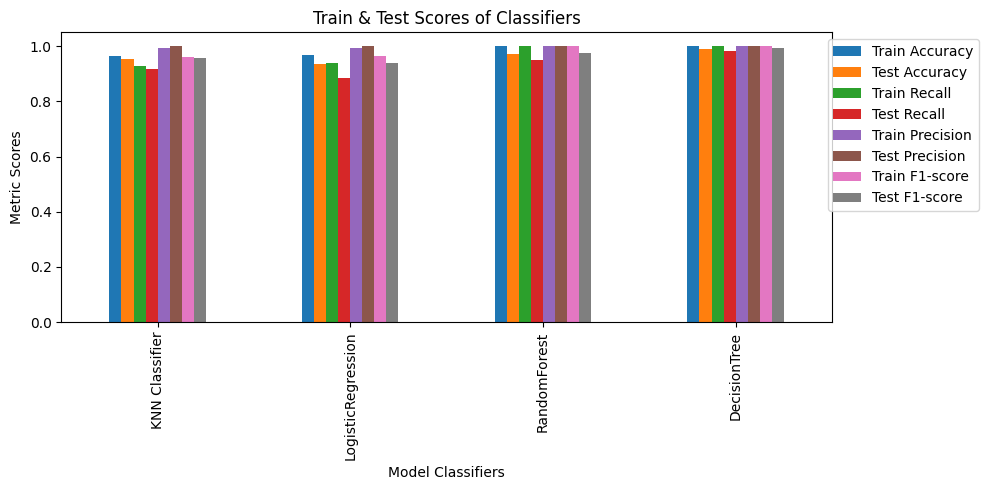

In [ ]:
by = result.plot(kind="bar", figsize=(10, 5))
by.set_xticks(range(len(result.index)))
by.set_xticklabels(result.Model, rotation=90)
plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Model Classifiers')
plt.ylabel('Metric Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


The above plot showcases the prediction of Metric scores(Accuracy,Recall,Precision,F1-score) obtained from training and testing the dataset using different Classifiers like Logistic,RandomForest,DecisionTree and KNN classifiers.

## 8.Symptom Clustering:

In [ ]:
from sklearn.cluster import KMeans

X = df2.drop('LUNG_CANCER', axis=1)
y = df2['LUNG_CANCER']

# Converting 'GENDER' to numerical representation

gender_encoder = LabelEncoder()
X['GENDER'] = gender_encoder.fit_transform(X['GENDER'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying KMeans clustering
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
df2['cluster'] = kmeans.fit_predict(X_scaled)

print(df2[['GENDER', 'AGE', 'LUNG_CANCER', 'cluster']])


    GENDER  AGE LUNG_CANCER  cluster
0        M   62         YES        0
1        M   55         YES        2
2        F   87          NO        2
3        M   64         YES        0
4        F   63          NO        2
..     ...  ...         ...      ...
535      M   62         YES        2
536      F   59         YES        1
537      F   63          NO        2
538      M   63          NO        1
539      M   56         YES        0

[540 rows x 4 columns]


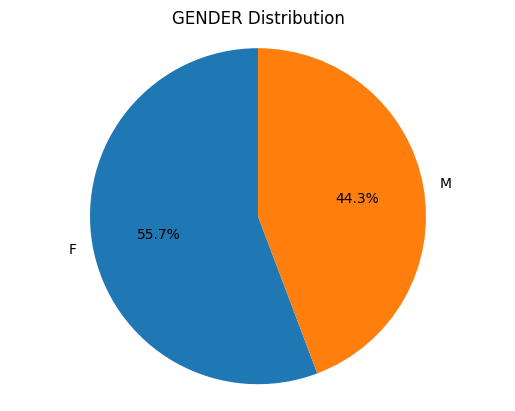

In [ ]:
# Pieplot is plotted to show the Gender disrtibution
gender_counts = df2['GENDER'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('GENDER Distribution')
plt.axis('equal')
plt.show()

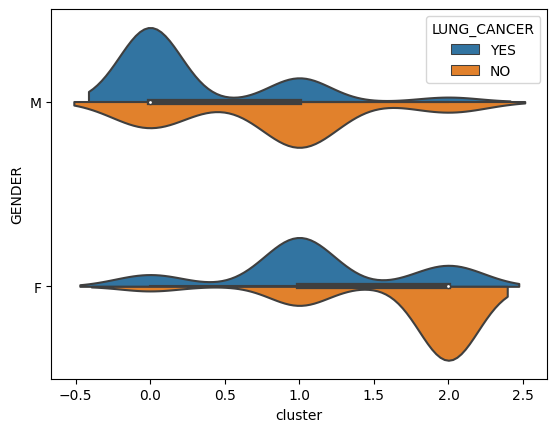

<Figure size 1600x800 with 0 Axes>

In [ ]:
# The split violin plot allows us to compare distributions of 'GENDER' within each cluster while distinguishing between cases with and without 'LUNG_CANCER'.
sns.violinplot(data=df2, x='cluster', y='GENDER', hue='LUNG_CANCER', split=True)
plt.figure(figsize=(16,8))
plt.show()


The above plot gives us some insights like Cluster Separation,Gender Distribution,Lung Cancer Distribution,etc.. For example,if certain clusters have a higher concentration of 'LUNG_CANCER' cases, it might imply that specific clusters are more susceptible to lung cancer.

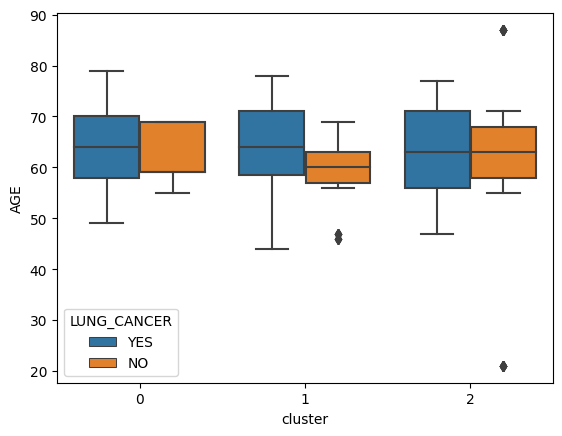

In [ ]:
# The box plot helps to visualize the distribution of 'AGE' within each cluster while considering the presence or absence of 'LUNG_CANCER'
sns.boxplot(data=df2, x='cluster', y='AGE', hue='LUNG_CANCER')
plt.show()


Some of the insights we can learn from the above plot are Age Distribution,Cluster Separation,Median Age,Outliers and Lung cancer impact,etc,..For example, Outliers in the boxplot indicate unusual cases that don't conform to the general age distribution in a specific cluster. And if there's a significant difference in age distribution between 'LUNG_CANCER' cases and non-cases in a particular cluster, it suggests a potential association.

## 9.Public Health Interventions:

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df2['LUNG_CANCER']= label_encoder.fit_transform(df2['LUNG_CANCER'])

### A. Anti-Smoking Campaign:

In [ ]:
# Printing the value counts for 'LUNG_CANCER' column

lung_cancer_value_counts = df2['LUNG_CANCER'].value_counts()
print("Value Counts for 'LUNG_CANCER' column:")
print(lung_cancer_value_counts)

# Calculating the number of lung cancer cases for smokers and non-smokers

lung_cancer_smokers = df2[(df2['LUNG_CANCER'] == 1) & (df2['SMOKING'] == 1)]
lung_cancer_non_smokers = df2[(df2['LUNG_CANCER'] == 1) & (df2['SMOKING'] == 0)]

num_lung_cancer_smokers = len(lung_cancer_smokers)
num_lung_cancer_non_smokers = len(lung_cancer_non_smokers)

print("Number of Lung Cancer Cases in Smokers:", num_lung_cancer_smokers)
print("Number of Lung Cancer Cases in Non-Smokers:", num_lung_cancer_non_smokers)


Value Counts for 'LUNG_CANCER' column:
1    270
0    270
Name: LUNG_CANCER, dtype: int64
Number of Lung Cancer Cases in Smokers: 165
Number of Lung Cancer Cases in Non-Smokers: 105


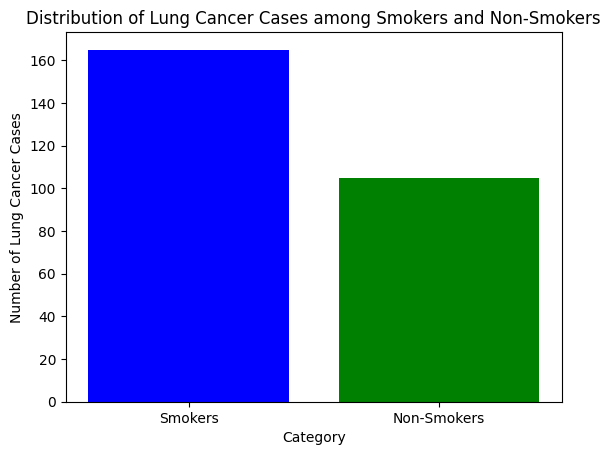

In [ ]:
# Plotting a Barplot to showcase no. of lung cancer cases who are smokers and no-smokers
import matplotlib.pyplot as plt

categories = ['Smokers', 'Non-Smokers']
counts = [num_lung_cancer_smokers, num_lung_cancer_non_smokers]

plt.bar(categories, counts, color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('Number of Lung Cancer Cases')
plt.title('Distribution of Lung Cancer Cases among Smokers and Non-Smokers')
plt.show()


The above Barplot shows the Distribution of Lung Cancer Cases among Smokers and Non-Smokers. So, here we can see that there are more no. of lung cancer cases that are seen in Smokers compared to non-Smokers.

### B. Age-Related Screenings:

In [ ]:
# Calculating the average age of individuals with lung cancer
average_age_lung_cancer_patients = df2[df2['LUNG_CANCER'] == 1]['AGE'].mean()

message = f"Early detection is crucial for lung cancer.\n The average age of individuals with lung cancer is {average_age_lung_cancer_patients:.1f} years. Consider age-related screenings for early detection."
print(message)


Early detection is crucial for lung cancer.
 The average age of individuals with lung cancer is 64.0 years. Consider age-related screenings for early detection.


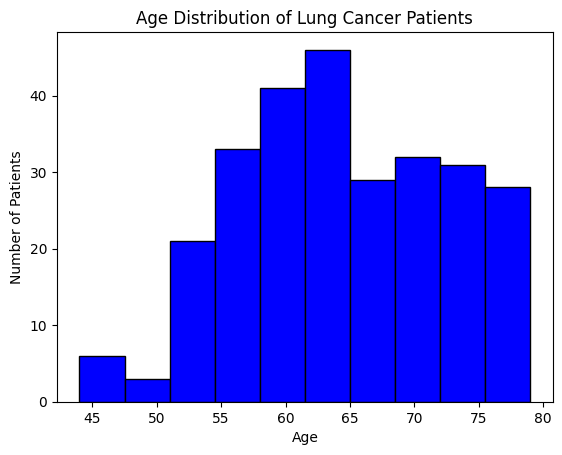

In [ ]:
# Visalization of Lung Cancer Patients using Histogram

lung_cancer_ages = df2[df2['LUNG_CANCER'] == 1]['AGE']

plt.hist(lung_cancer_ages, bins=10, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Lung Cancer Patients')
plt.show()

From the above graph we can see that most of the people who are suffering from Lung cancer are between the age of 60-65 and after that between the age of 65-80. Least people affected are between 45-50 age.

### C. Chronic Disease Management:

In [ ]:
# Number of lung cancer cases with and without chronic diseases
lung_cancer_chronic_disease = df2[(df2['LUNG_CANCER'] == 1) & (df2['CHRONIC DISEASE'] == 1)]
lung_cancer_no_chronic_disease = df2[(df2['LUNG_CANCER'] == 1) & (df2['CHRONIC DISEASE'] == 0)]

# Calculating  the total number of lung cancer cases
total_lung_cancer_cases = df2['LUNG_CANCER'].sum()

if total_lung_cancer_cases > 0:
    percentage_lung_cancer_chronic_disease = (len(lung_cancer_chronic_disease) / total_lung_cancer_cases) * 100
    percentage_lung_cancer_no_chronic_disease = (len(lung_cancer_no_chronic_disease) / total_lung_cancer_cases) * 100

    message = f"Chronic diseases can increase the risk of lung cancer. {percentage_lung_cancer_chronic_disease:.1f}% of lung cancer cases have chronic diseases,\n and {percentage_lung_cancer_no_chronic_disease:.1f}% don't have chronic diseases.\n Effective management of chronic conditions is essential."
    print(message)
else:
    print("No cases of lung cancer in the dataset.")


Chronic diseases can increase the risk of lung cancer. 51.9% of lung cancer cases have chronic diseases,
 and 48.1% don't have chronic diseases.
 Effective management of chronic conditions is essential.


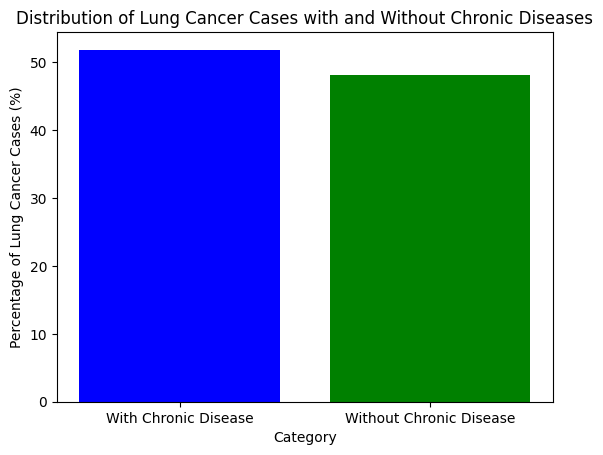

In [ ]:
# Drawing a barplot to show the Distribution of Lung Cancer Cases with and Without Chronic Diseases

categories = ['With Chronic Disease', 'Without Chronic Disease']
percentages = [percentage_lung_cancer_chronic_disease, percentage_lung_cancer_no_chronic_disease]

plt.bar(categories, percentages, color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('Percentage of Lung Cancer Cases (%)')
plt.title('Distribution of Lung Cancer Cases with and Without Chronic Diseases')
plt.show()

From the above plot we can see that there is not much difference between the  no. of Lung cancer cases incase of having Chronic disease(51.9%) and without Chronic disease(48.1%).

### D. Fatigue Awareness:

In [ ]:
# Number of lung cancer cases with and without fatigue
lung_cancer_fatigue = df2[(df2['LUNG_CANCER'] == 1) & (df2['FATIGUE '] == 1)]
lung_cancer_no_fatigue = df2[(df2['LUNG_CANCER'] == 1) & (df2['FATIGUE '] == 0)]

total_lung_cancer_cases = df2['LUNG_CANCER'].sum()

if total_lung_cancer_cases > 0:
    percentage_lung_cancer_fatigue = (len(lung_cancer_fatigue) / total_lung_cancer_cases) * 100
    percentage_lung_cancer_no_fatigue = (len(lung_cancer_no_fatigue) / total_lung_cancer_cases) * 100

    # Creating a campaign message for fatigue awareness
    message = f"Fatigue may be linked to lung cancer.\n{percentage_lung_cancer_fatigue:.1f}% of lung cancer cases have fatigue, and {percentage_lung_cancer_no_fatigue:.1f}% don't have fatigue.\nIf you experience persistent fatigue, consult a healthcare professional."
    print(message)
else:
    print("No cases of lung cancer in the dataset.")


Fatigue may be linked to lung cancer.
72.2% of lung cancer cases have fatigue, and 27.8% don't have fatigue.
If you experience persistent fatigue, consult a healthcare professional.


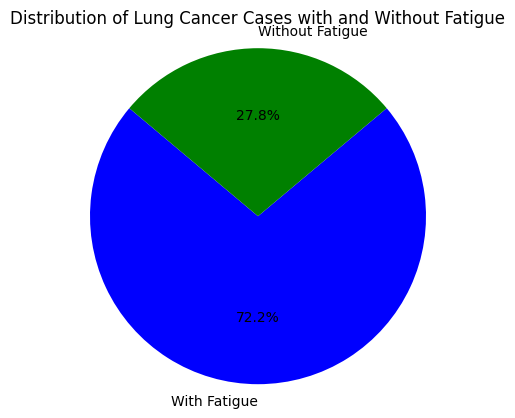

In [ ]:
# Drawing a Pie chart to show the Distribution of Lung Cancer Cases with and Without Fatigue

labels = ['With Fatigue', 'Without Fatigue']
sizes = [len(lung_cancer_fatigue), len(lung_cancer_no_fatigue)]
colors = ['blue', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Lung Cancer Cases with and Without Fatigue')
plt.show()

From the above plot we can clearly understand that 72.2% of lung cancer cases have fatigue and 27.8% don't have fatigue.The insights we can get fromthis are Percentage Distribution,Comparative Analysis and Potential Association.

### E. Respiratory Health Education:

In [ ]:
# Number of lung cancer cases with and without respiratory symptoms

lung_cancer_respiratory_symptoms = df2[(df2['LUNG_CANCER'] == 1) & ((df2['WHEEZING'] == 1) | (df2['SHORTNESS OF BREATH'] == 1) | (df2['COUGHING'] == 1))]
lung_cancer_no_respiratory_symptoms = df2[(df2['LUNG_CANCER'] == 1) & (df2['WHEEZING'] == 0) & (df2['SHORTNESS OF BREATH'] == 0) & (df2['COUGHING'] == 0)]

total_lung_cancer_cases = df2['LUNG_CANCER'].sum()

if total_lung_cancer_cases > 0:

    percentage_lung_cancer_respiratory_symptoms = (len(lung_cancer_respiratory_symptoms) / total_lung_cancer_cases) * 100
    percentage_lung_cancer_no_respiratory_symptoms = (len(lung_cancer_no_respiratory_symptoms) / total_lung_cancer_cases) * 100

# Creating a campaign message for respiratory health education
    message = f"Respiratory symptoms may be associated with lung cancer.\n{percentage_lung_cancer_respiratory_symptoms:.1f}% of lung cancer cases have respiratory symptoms, and {percentage_lung_cancer_no_respiratory_symptoms:.1f}% don't report such symptoms.\nLearn about respiratory health and seek medical attention if needed."
    print(message)
else:
    print("No cases of lung cancer in the dataset.")


Respiratory symptoms may be associated with lung cancer.
90.0% of lung cancer cases have respiratory symptoms, and 10.0% don't report such symptoms.
Learn about respiratory health and seek medical attention if needed.


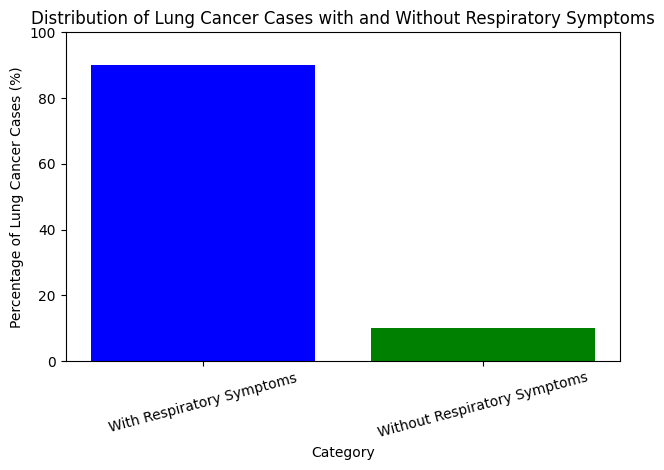

In [ ]:
categories = ['With Respiratory Symptoms', 'Without Respiratory Symptoms']
percentages = [percentage_lung_cancer_respiratory_symptoms, percentage_lung_cancer_no_respiratory_symptoms]
colors = ['blue', 'green']

# Creating a bar plot
plt.bar(categories, percentages, color=colors)
plt.xlabel('Category')
plt.ylabel('Percentage of Lung Cancer Cases (%)')
plt.title('Distribution of Lung Cancer Cases with and Without Respiratory Symptoms')
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

From the above barplot we can see that most of the people who have
Respiratory problems seems to have a higher risk of getting Lung cancer compared to no Respiratory symptoms. Some of the insights we can get from this plot are Respiratory Symptoms Impact and their Significance, Risk Assessment,Potential Implications,etc,..

# 10.Healthcare Resource Allocation:

In [ ]:
X = df2.drop('LUNG_CANCER', axis=1)
y = df2['LUNG_CANCER']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

encoder = OneHotEncoder(drop='first', sparse_output=True)
X_encoded = encoder.fit_transform(X[['GENDER']])
X.drop('GENDER', axis=1, inplace=True)

X_combined = hstack([X.values, X_encoded])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=False)
ct = ColumnTransformer(
    transformers=[('num', scaler, slice(0, X.shape[1]))], remainder='passthrough'
)
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Defining a threshold probability to filter high-risk individuals
threshold = 0.5

# Converting probabilities to binary predictions based on the threshold
y_pred = (y_pred_prob >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Resetting the index
X.reset_index(drop=True, inplace=True)



Accuracy: 0.94


## Classification report

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        47
           1       1.00      0.89      0.94        61

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.93       108
weighted avg       0.94      0.94      0.94       108



 The classification report provides a comprehensive overview of the model's performance for each class. It's important to consider both precision and recall together, as well as the F1-score, to get a better understanding of how well the model is performing for different classes. In this case, the model seems to have a good balance between precision and recall for both classes, as indicated by the high F1-scores and accuracy.

In [ ]:
# Predicting probabilities of lung cancer
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

result_df = pd.DataFrame({'Actual': y_test, 'Predicted_Probability': y_pred_prob})

# Sorting the DataFrame by predicted probabilities in descending order
result_df = result_df.sort_values(by='Predicted_Probability', ascending=False)

# Top 10 areas with the highest predicted probabilities (higher health risks)
top_10_high_risk_areas = result_df.head(10)

# Allocate healthcare resources to the top 10 high-risk areas
print("Top 10 High-Risk Areas:")
print(top_10_high_risk_areas)


Top 10 High-Risk Areas:
    Actual  Predicted_Probability
66       1               0.999994
18       1               0.999983
13       1               0.999970
22       1               0.999925
51       1               0.999884
69       1               0.999874
98       1               0.999868
1        1               0.999837
27       1               0.999837
96       1               0.999837


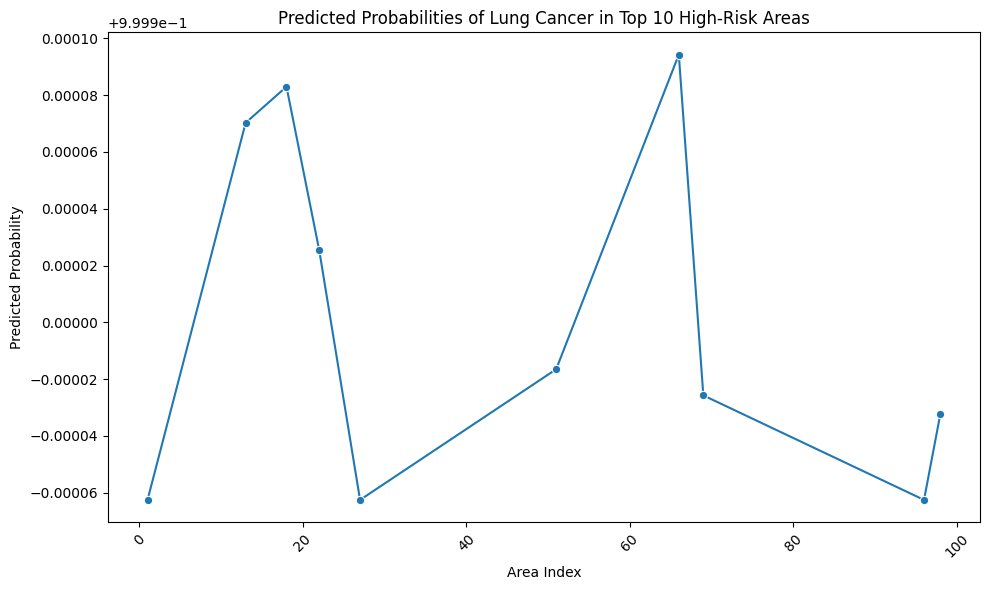

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already performed the necessary data preparation and modeling steps.

# Predicting probabilities of lung cancer
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

result_df = pd.DataFrame({'Actual': y_test, 'Predicted_Probability': y_pred_prob})

# Sorting the DataFrame by predicted probabilities in descending order
result_df = result_df.sort_values(by='Predicted_Probability', ascending=False)


# Assuming you want to plot the predicted probabilities of the top 10 high-risk areas
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_10_high_risk_areas, x=top_10_high_risk_areas.index, y='Predicted_Probability', marker='o')
plt.xlabel('Area Index')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities of Lung Cancer in Top 10 High-Risk Areas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The plot showcases the areas with the highest predicted probabilities of lung cancer, offering insights into potential high-risk regions that could warrant targeted healthcare interventions or further analysis.

In [ ]:
# Creating the risk categories based on predicted probabilities
result_df['Risk_Category'] = pd.cut(result_df['Predicted_Probability'], bins=[0, 0.3, 0.6, 1], labels=['Low', 'Medium', 'High'])

low_risk_areas = result_df[result_df['Risk_Category'] == 'Low']
medium_risk_areas = result_df[result_df['Risk_Category'] == 'Medium']
high_risk_areas = result_df[result_df['Risk_Category'] == 'High']

print("Low-Risk Areas:")
print(low_risk_areas.head())

print("Medium-Risk Areas:")
print(medium_risk_areas.head())

print("High-Risk Areas:")
print(high_risk_areas.head())


Low-Risk Areas:
    Actual  Predicted_Probability Risk_Category
70       1               0.278307           Low
86       1               0.278307           Low
37       0               0.149394           Low
76       0               0.113692           Low
2        0               0.105164           Low
Medium-Risk Areas:
     Actual  Predicted_Probability Risk_Category
11        0               0.478762        Medium
12        0               0.478762        Medium
75        0               0.478762        Medium
46        1               0.449529        Medium
100       1               0.409832        Medium
High-Risk Areas:
    Actual  Predicted_Probability Risk_Category
66       1               0.999994          High
18       1               0.999983          High
13       1               0.999970          High
22       1               0.999925          High
51       1               0.999884          High


 From the above output we can see the risk categories for each area based on the predicted probabilities of lung cancer. The risk categories are 'Low', 'Medium', and 'High', with corresponding probability ranges.

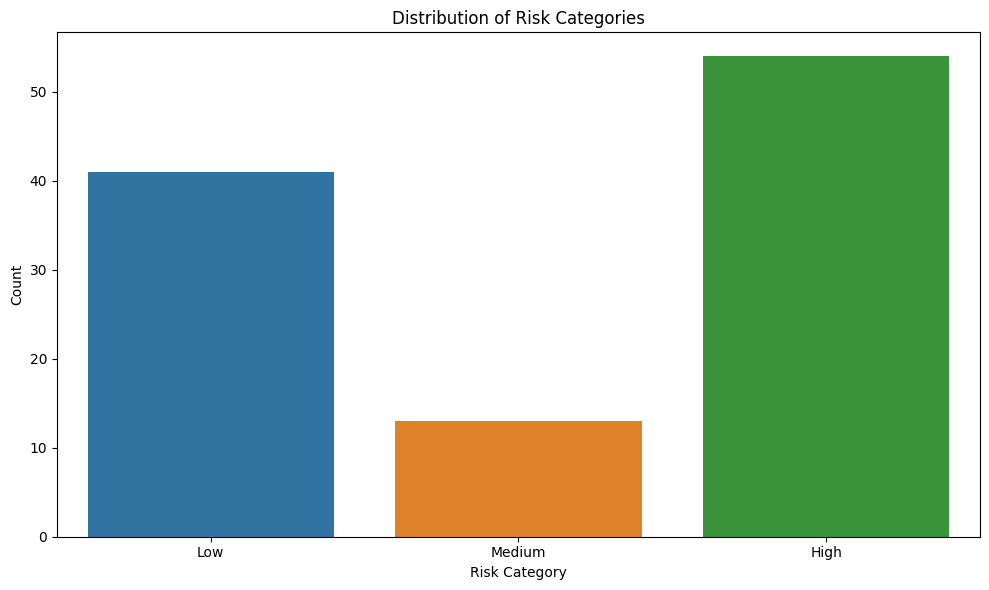

In [ ]:
low_risk_areas = result_df[result_df['Risk_Category'] == 'Low']
medium_risk_areas = result_df[result_df['Risk_Category'] == 'Medium']
high_risk_areas = result_df[result_df['Risk_Category'] == 'High']

# Plotting the distribution of risk categories

plt.figure(figsize=(10, 6))
sns.countplot(data=result_df, x='Risk_Category', order=['Low', 'Medium', 'High'])
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.title('Distribution of Risk Categories')
plt.tight_layout()
plt.show()


 The above plot demonstrate the process of categorizing predicted probabilities into risk categories ('Low', 'Medium', 'High') and then visualizing the distribution of these risk categories using a count plot.By observing the count plot, you can understand the distribution of areas across risk categories. If one category dominates, it indicates a prevalence of areas with that specific risk level.This plot provides a quick overview of how many areas fall into each risk category.It can help healthcare professionals and policymakers assess the scale of potential risks and allocate resources accordingly.

## CONCLUSION                      

In this analysis, we explored a dataset containing information related to various health attributes, behaviors, and demographics, aiming to understand the risk factors associated with lung cancer. We also built predictive models to identify individuals at higher risk of developing lung cancer. Here are the key insights and conclusions from the analysis given below:

1.Gender and Lung Cancer: The dataset revealed that a larger proportion of females are suffering from lung cancer compared to males.

2.Age and Lung Cancer: The age distribution of individuals with lung cancer showed that the majority fall within the 55-75 age range, with outliers indicating cases outside this range.

3.Respiratory Symptoms: Lung cancer patients tend to experience more respiratory symptoms such as coughing, wheezing, and shortness of breath.

4.Health Behaviors: Individuals with lung cancer are more likely to have a history of smoking and alcohol consumption.

5.Chronic Diseases and Fatigue: Chronic diseases and fatigue are prevalent among individuals with lung cancer.

6.Health Risk Assessment: The correlation heatmap identified positive correlations between certain health attributes such as anxiety, allergy, chest pain, and fatigue.



